In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/SPECTR/Clinic_DataPDBioStampRCStudy.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data.head(-1)

,ID,Sex,Status,Age,updrs_3_17a,updrs_3_17b,updrs_3_17c,updrs_3_17d,updrs_3_17e,updrs_3_17a_off,updrs_3_17b_off,updrs_3_17c_off,updrs_3_17d_off,updrs_3_17e_off,updrs_3_17a_on,updrs_3_17b_on,updrs_3_17c_on,updrs_3_17d_on,updrs_3_17e_on
0,5,Female,Control,74,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,Male,PD,73,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
2,7,Female,Control,52,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Female,Control,77,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,Female,PD,72,NaN,NaN,NaN,NaN,NaN,3.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
5,12,Female,PD,64,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,13,Female,PD,60,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,14,Female,Control,56,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15,Male,PD,65,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
9,16,Female,Control,62,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для всех участников демографические данные и результаты клинических исследований
предоставляются в виде zip-файла «Clinic_DataPDBioStampRCStudy.zip». При распаковке
файла создается CSV-файл с именем Clinic_Data_PD-BioStampRC21.csv


Формат файла с демографическими и клиническими данными: состоит из 19 столбцов

Столбец 1: «ID» — идентификатор участника

Колонка 2: «Пол» — пол участника (мужской/женский)

Столбец 3: «Статус» — статус заболевания участника (PD/контроль)

Столбец 4: «Возраст» — возраст участника

Столбец 5: «updrs_3_17a» — амплитуда тремора покоя (RUE — правая верхняя конечность)

Столбец 6: «updrs_3_17b» — амплитуда тремора покоя (LUE — левая верхняя конечность)

Столбец 7: «updrs_3_17c» — амплитуда тремора покоя (RLE — правая нижняя конечность)

Столбец 8: «updrs_3_17d» — амплитуда тремора покоя (LLE — правая нижняя конечность)

Столбец 9: «updrs_3_17e» — амплитуда тремора покоя (губы/челюсть)

Столбец 10 — Столбец 14: «updrs_3_17a_off» — «updrs_3_17e_off» — Амплитуда тремора покоя во время оценки состояния без приема лекарств
(порядок аналогичен порядку в столбцах с 5 по 9)

Столбец 15 — Столбец 19: «updrs_3_17a_on» — «updrs_3_17e_on» — амплитуда тремора покоя во время оценки действия препарата


# **Описательная статистика**

In [ ]:
data.describe()

,ID,Age,updrs_3_17a,updrs_3_17b,updrs_3_17c,updrs_3_17d,updrs_3_17e,updrs_3_17a_off,updrs_3_17b_off,updrs_3_17c_off,updrs_3_17d_off,updrs_3_17e_off,updrs_3_17a_on,updrs_3_17b_on,updrs_3_17c_on,updrs_3_17d_on,updrs_3_17e_on
count,34.000000,34.000000,22.000000,22.000000,22.000000,22.000000,22.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,29.147059,65.176471,0.090909,0.272727,0.045455,0.136364,0.090909,1.083333,0.416667,0.750000,0.083333,0.166667,0.750000,0.333333,0.333333,0.083333,0.166667
std,16.915355,10.549941,0.426401,0.767297,0.213201,0.467563,0.294245,1.083625,0.792961,0.866025,0.288675,0.389249,0.965307,0.651339,0.492366,0.288675,0.389249
min,5.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.250000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,40.750000,72.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,0.250000,1.250000,0.000000,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000
max,63.000000,84.000000,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
data_f= data[data['Sex']=='Female']
data_m= data[data['Sex']=='Male']

# **Категории**


Распределение по полу:
Sex
Female    20
Male      14
Name: count, dtype: int64

Распределение по статусу:
Status
Control    17
PD         17
Name: count, dtype: int64

Распределение по статусу среди женщин:
Status
Control    13
PD          7
Name: count, dtype: int64

Распределение по статусу среди мужчин:
Status
PD         10
Control     4
Name: count, dtype: int64


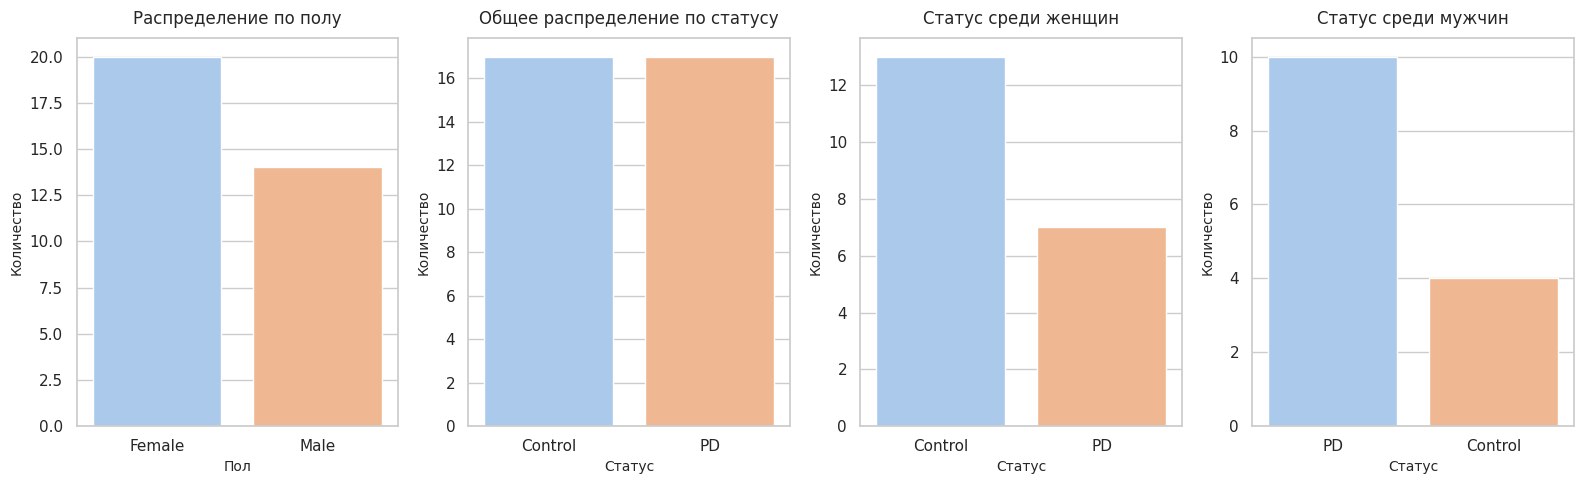

In [ ]:
print("\nРаспределение по полу:")
print(data['Sex'].value_counts())

print("\nРаспределение по статусу:")
print(data['Status'].value_counts())

print("\nРаспределение по статусу среди женщин:")
print(data_f['Status'].value_counts())

print("\nРаспределение по статусу среди мужчин:")
print(data_m['Status'].value_counts())


sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
ax1 = sns.countplot(x='Sex', data=data, hue='Sex', dodge=False)
plt.title('Распределение по полу', fontsize=12, pad=10)
plt.xlabel('Пол', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.subplot(1, 4, 2)
ax2 = sns.countplot(x='Status', data=data, hue='Status', dodge=False)
plt.title('Общее распределение по статусу', fontsize=12, pad=10)
plt.xlabel('Статус', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.subplot(1, 4, 3)
ax3 = sns.countplot(x='Status', data=data_f, hue='Status', dodge=False)
plt.title('Статус среди женщин', fontsize=12, pad=10)
plt.xlabel('Статус', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.subplot(1, 4, 4)
ax4 = sns.countplot(x='Status', data=data_m, hue='Status', dodge=False)
plt.title('Статус среди мужчин', fontsize=12, pad=10)
plt.xlabel('Статус', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.tight_layout()
plt.show()

# **Числовых переменных**

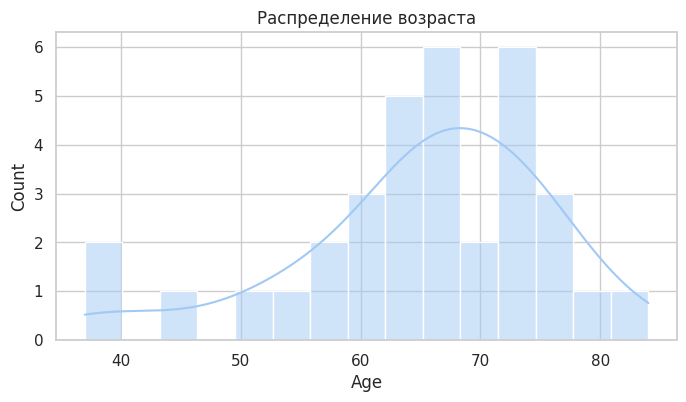

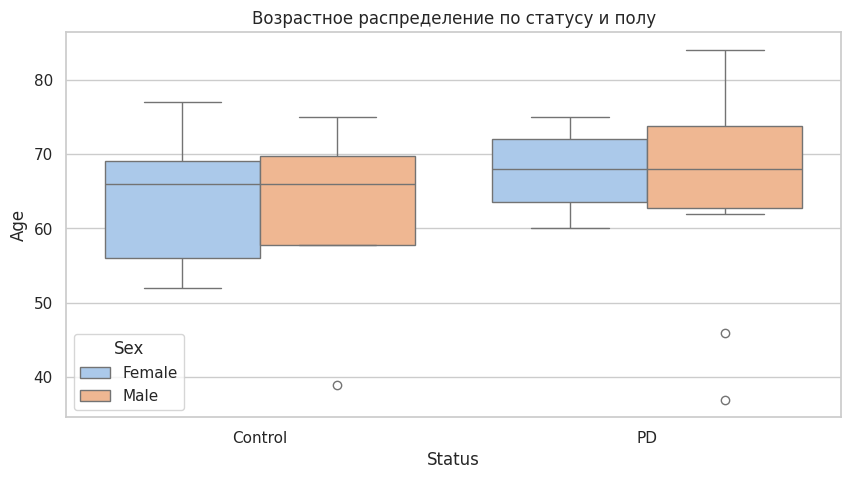

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], kde=True, bins=15)
plt.title('Распределение возраста')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Status', y='Age', hue='Sex', data=data)
plt.title('Возрастное распределение по статусу и полу')
plt.show()

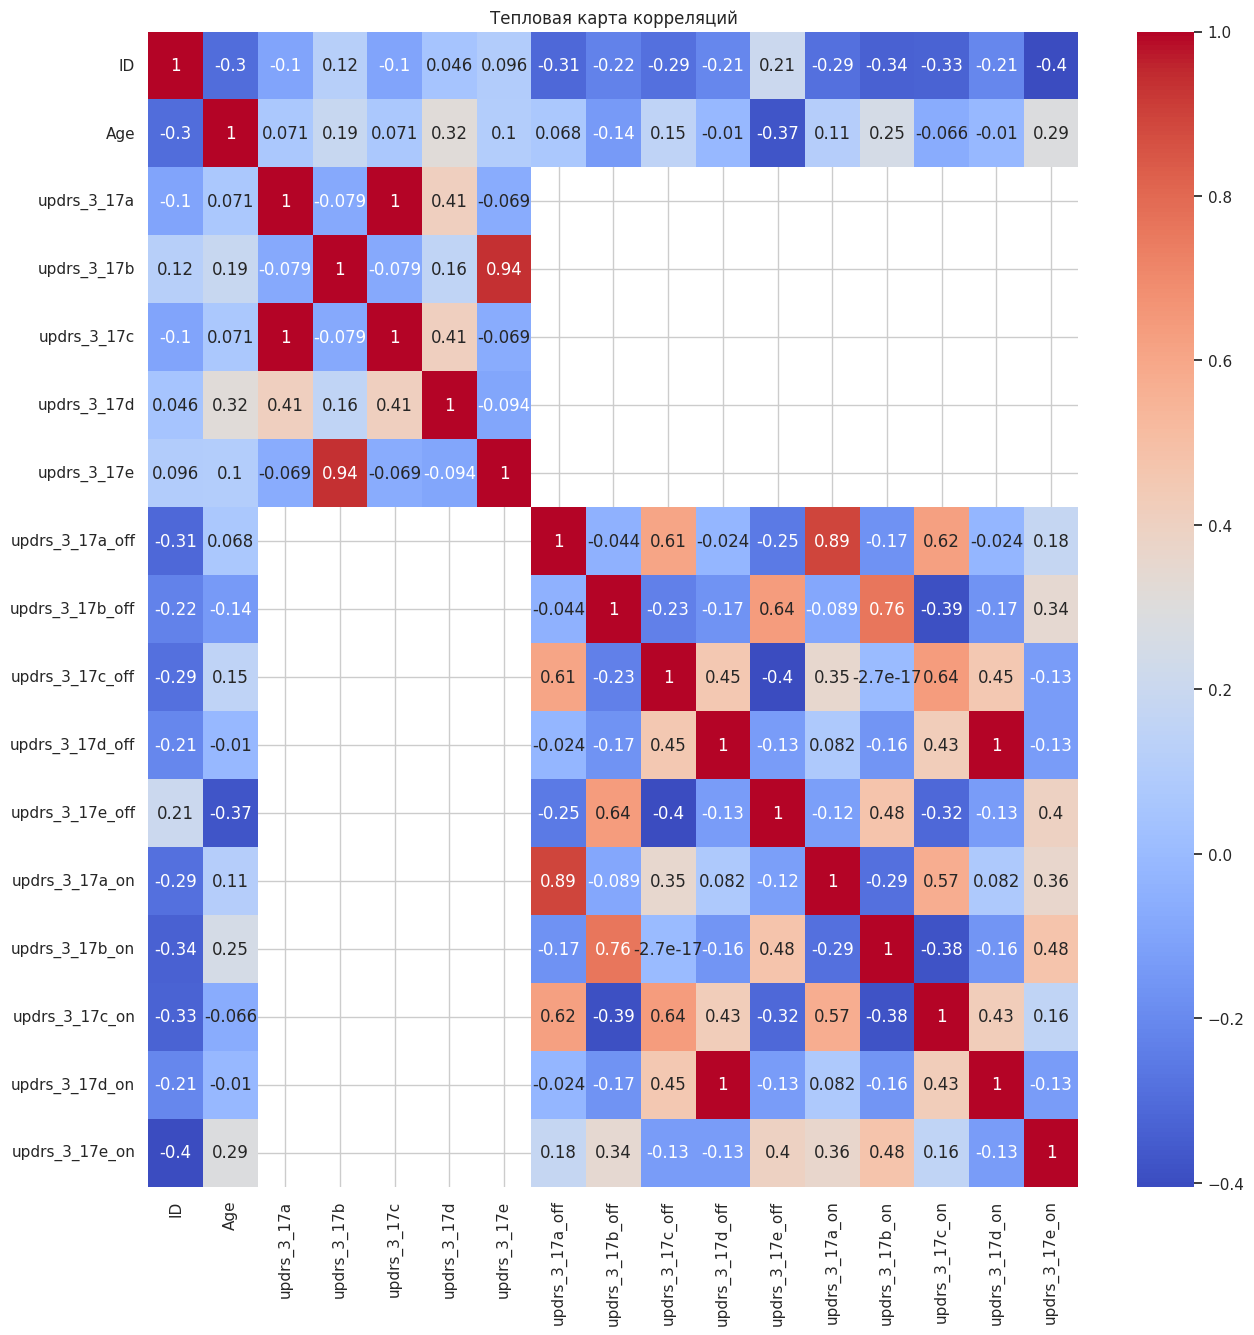

In [ ]:
# Корреляция между числовыми признаками
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

([<matplotlib.axis.XTick at 0x7cdf23f1db10>,
 [Text(0, 0, '17a: Руки в покое'),
  Text(1, 0, '17b: Руки в позе'),
  Text(2, 0, '17c: Ноги в покое'),
  Text(3, 0, '17d: Губы/подбородок'),
  Text(4, 0, '17e: Другой тремор')])

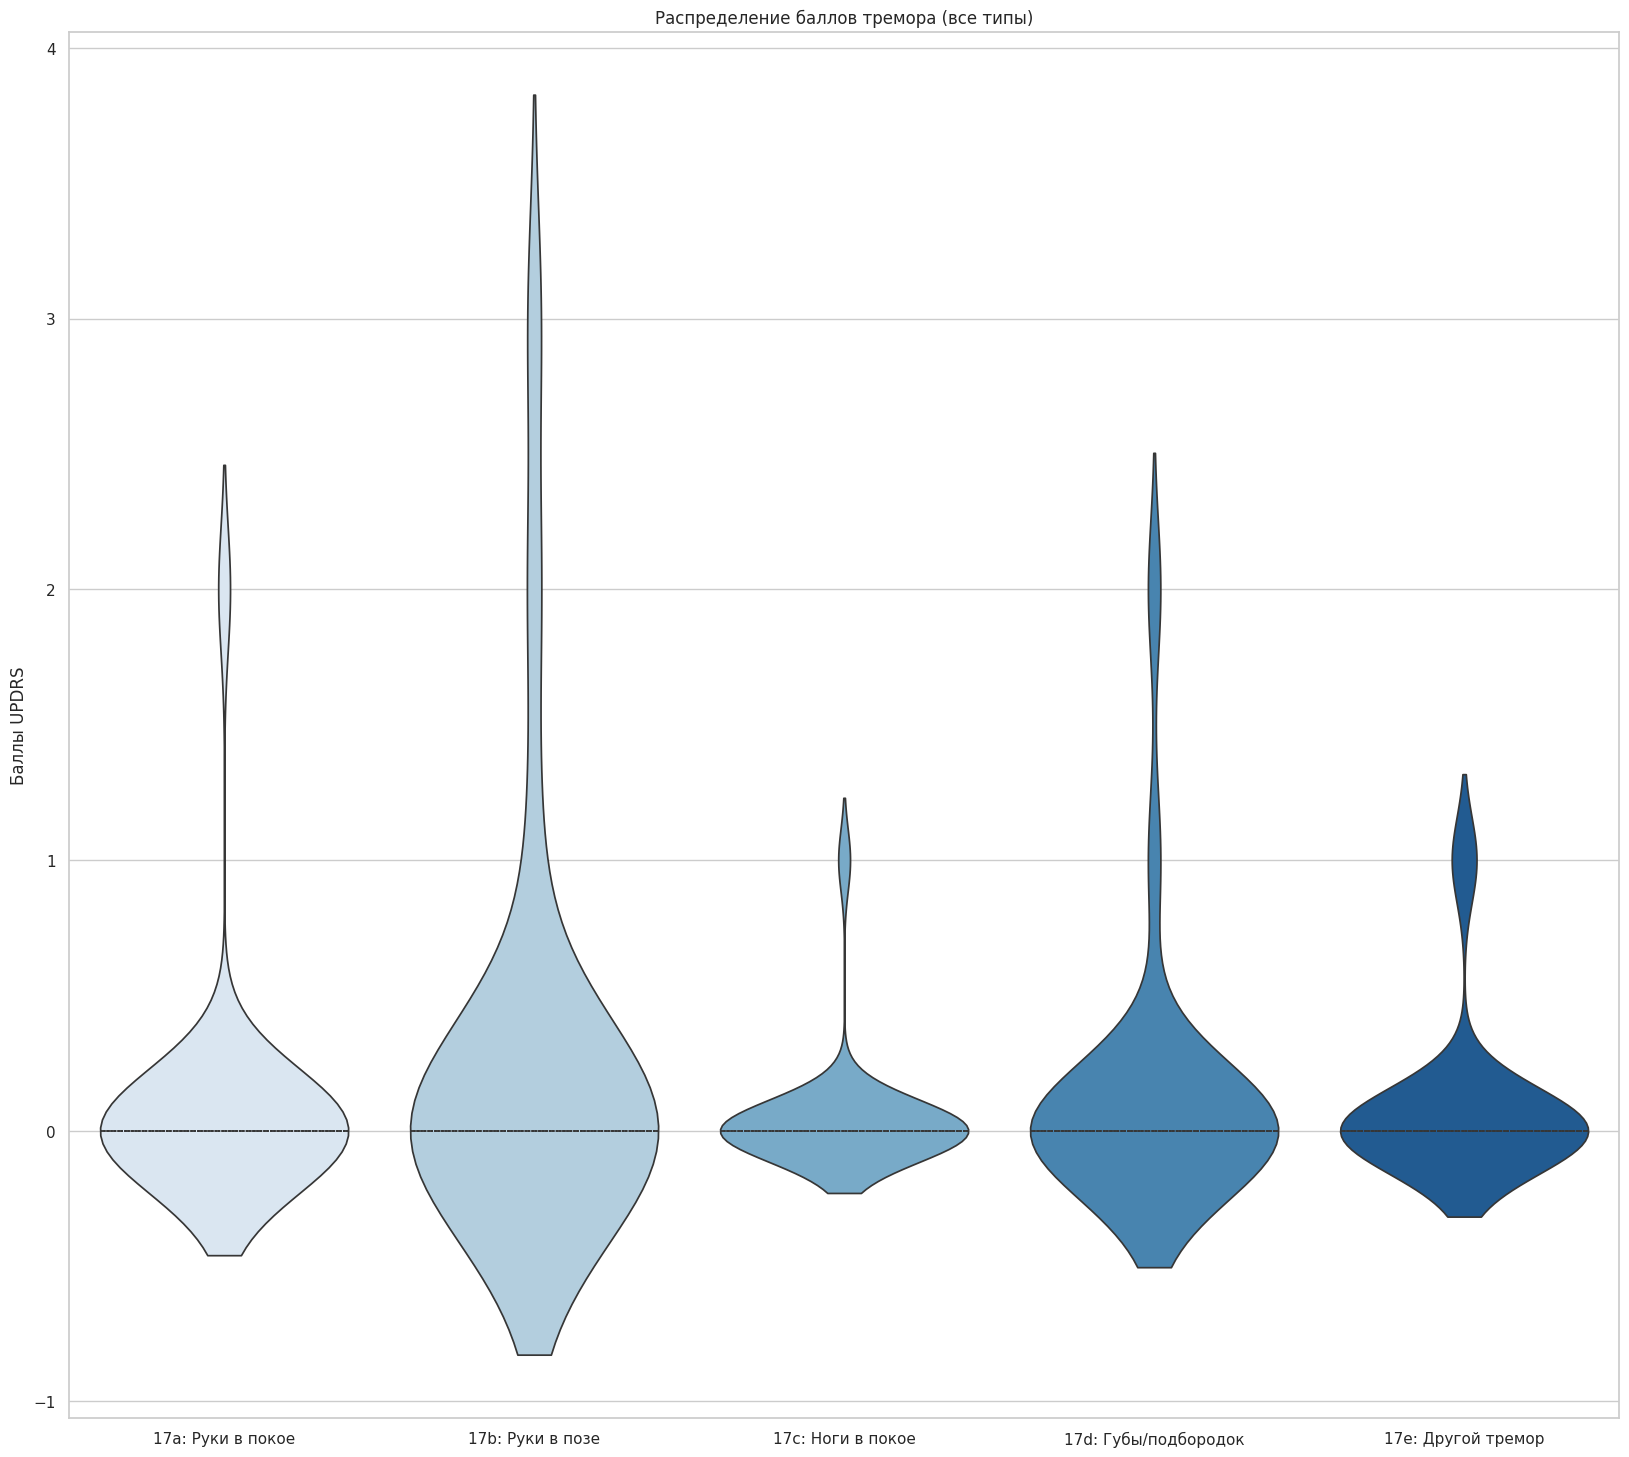

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(20,18))
tremor_cols = ['updrs_3_17a', 'updrs_3_17b', 'updrs_3_17c', 'updrs_3_17d', 'updrs_3_17e']
sns.violinplot(data=data[tremor_cols], inner="quartile", palette="Blues")
plt.title('Распределение баллов тремора (все типы)')
plt.ylabel('Баллы UPDRS')
plt.xticks(ticks=range(5),
           labels=['17a: Руки в покое', '17b: Руки в позе', '17c: Ноги в покое',
                   '17d: Губы/подбородок', '17e: Другой тремор'])

Text(0.5, 1.0, 'Корреляция между разными типами тремора')

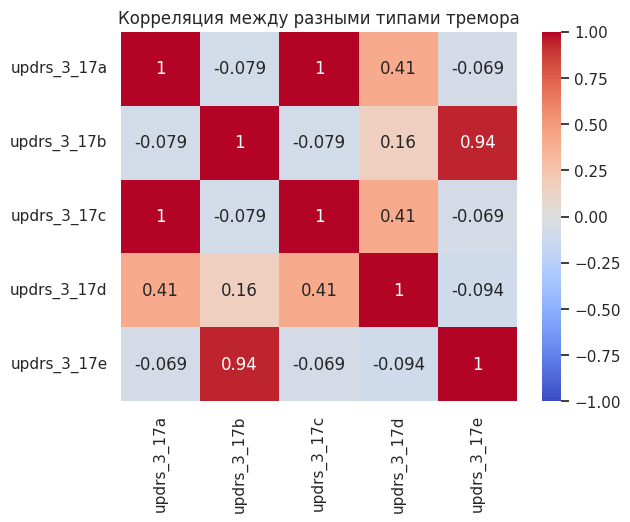

In [ ]:
corr_matrix = data[['updrs_3_17a', 'updrs_3_17b', 'updrs_3_17c', 'updrs_3_17d', 'updrs_3_17e']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Корреляция между разными типами тремора')
